### EDA Report

In [2]:
# Import all Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [117]:
# Load data
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/05_Predictive Analytics for Hospital Readmissions/02_Dataset/featured-engineered_data.csv")

In [119]:
# save plots path
plot_dir = "R:/Projects/1_Data_Science & ML_Projects/05_Predictive Analytics for Hospital Readmissions/06_reports"

In [121]:
# Set up visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

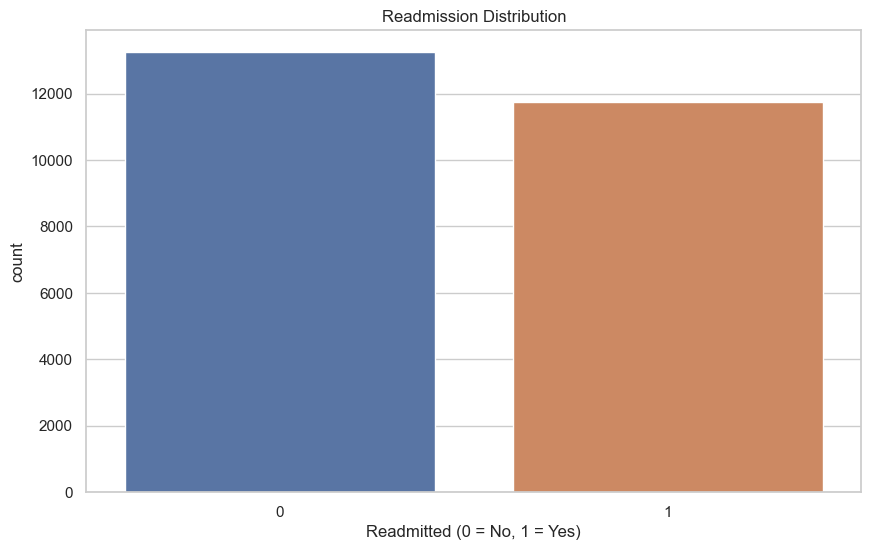

In [123]:
### 1. Readmission distribution
plt.figure()
sns.countplot(x='readmitted', data=df)
plt.title("Readmission Distribution")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.savefig(f"{plot_dir}/1_readmission_distribution.png")

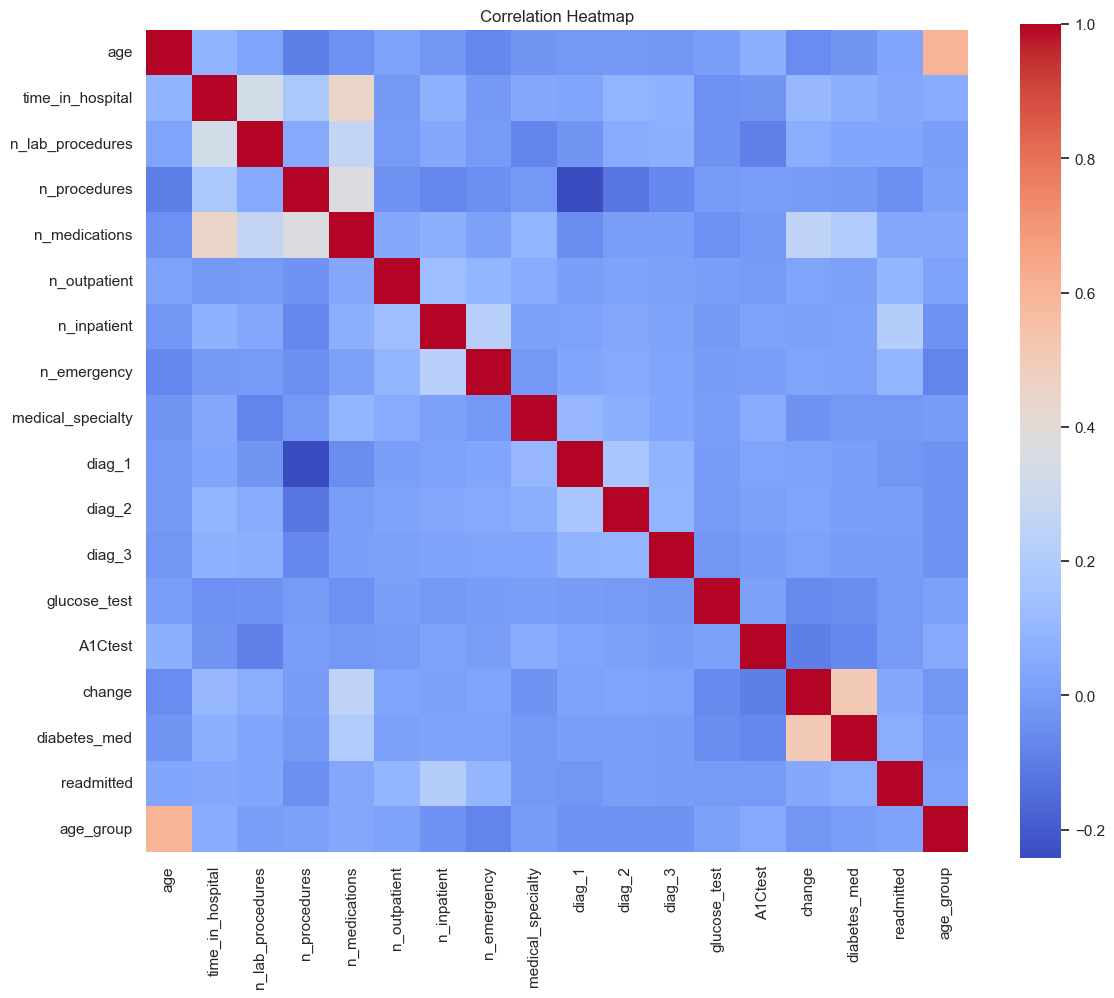

In [125]:
### 2. Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{plot_dir}/2_correlation_heatmap.png")

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


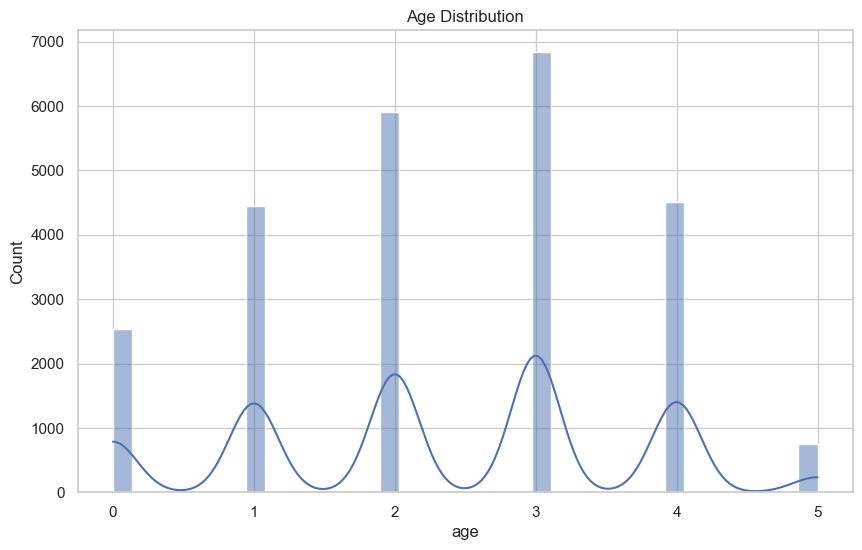

In [127]:
### 3. Age distribution
if 'age' in df.columns:
    plt.figure()
    sns.histplot(df['age'], kde=True)
    plt.title("Age Distribution")
    plt.savefig(f"{plot_dir}/3_age_distribution.png")

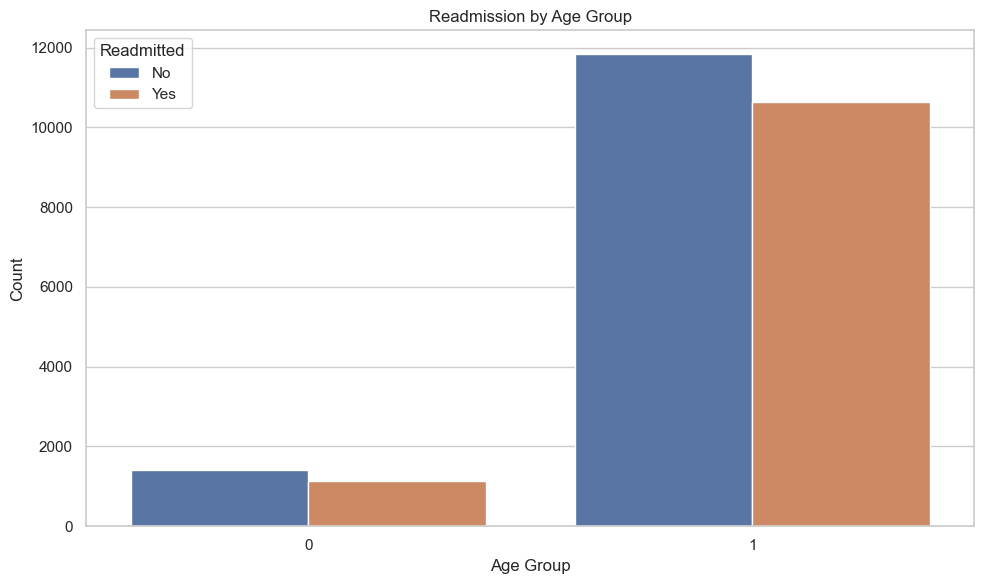

In [129]:
### 4. Age Group vs Readmission (if age_group exists)
if "age_group" in df.columns:
    df["readmitted_label"] = df["readmitted"].map({0: "No", 1: "Yes"})
    sns.countplot(x="age_group", hue="readmitted_label", data=df)
    plt.title("Readmission by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title="Readmitted")
    plt.tight_layout()
    plt.savefig("R:/Projects/1_Data_Science & ML_Projects/05_Predictive Analytics for Hospital Readmissions/06_reports/4_readmission_by_age_group.png")

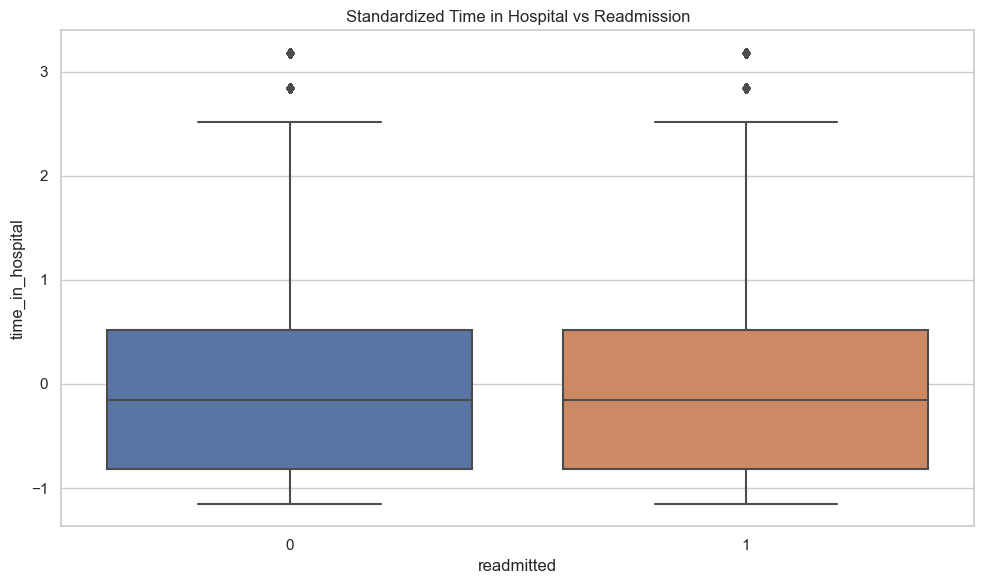

In [131]:
### 5. Standardized Time in Hospital vs Readmissio
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title("Standardized Time in Hospital vs Readmission")
plt.tight_layout()
plt.savefig(f"{plot_dir}/5_time_in_hospital_scaled_vs_readmission.png")

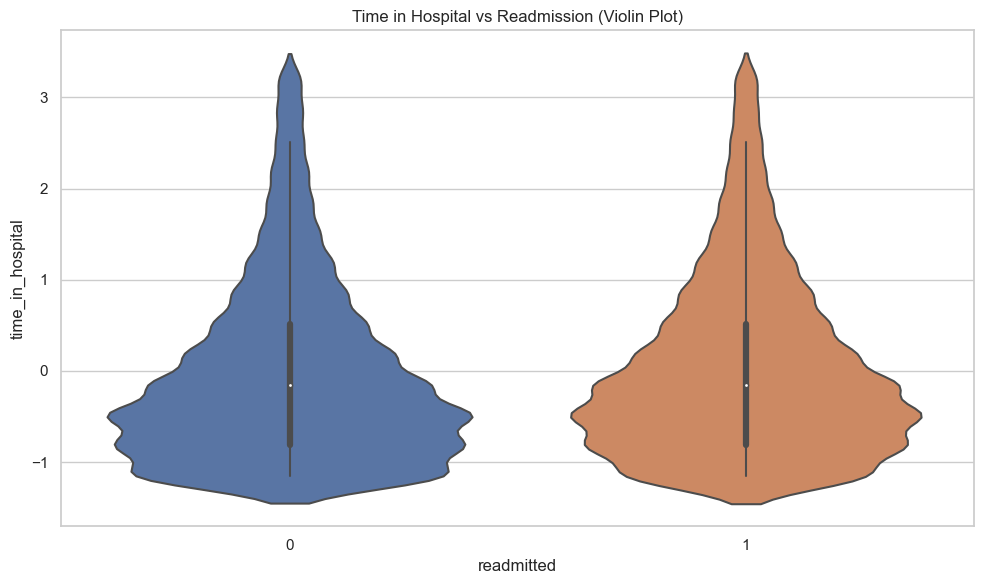

In [133]:
### 6. Violin Plot – Time in Hospital vs Readmission
if 'time_in_hospital' in df.columns:
    plt.figure()
    sns.violinplot(x='readmitted', y='time_in_hospital', data=df)
    plt.title("Time in Hospital vs Readmission (Violin Plot)")
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/6_violin_time_in_hospital.png")

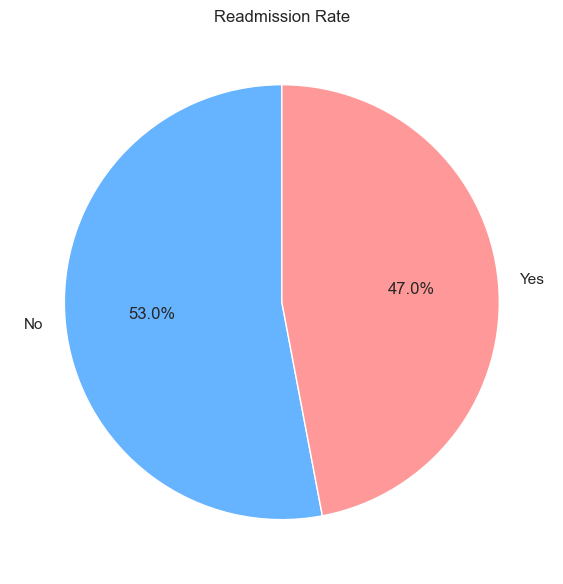

In [135]:
### 7. Pie Chart – Readmission Ratio
readmit_counts = df['readmitted'].value_counts()
labels = ['No', 'Yes']
plt.figure()
plt.pie(readmit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Readmission Rate")
plt.tight_layout()
plt.savefig(f"{plot_dir}/7_readmission_pie_chart.png")

C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

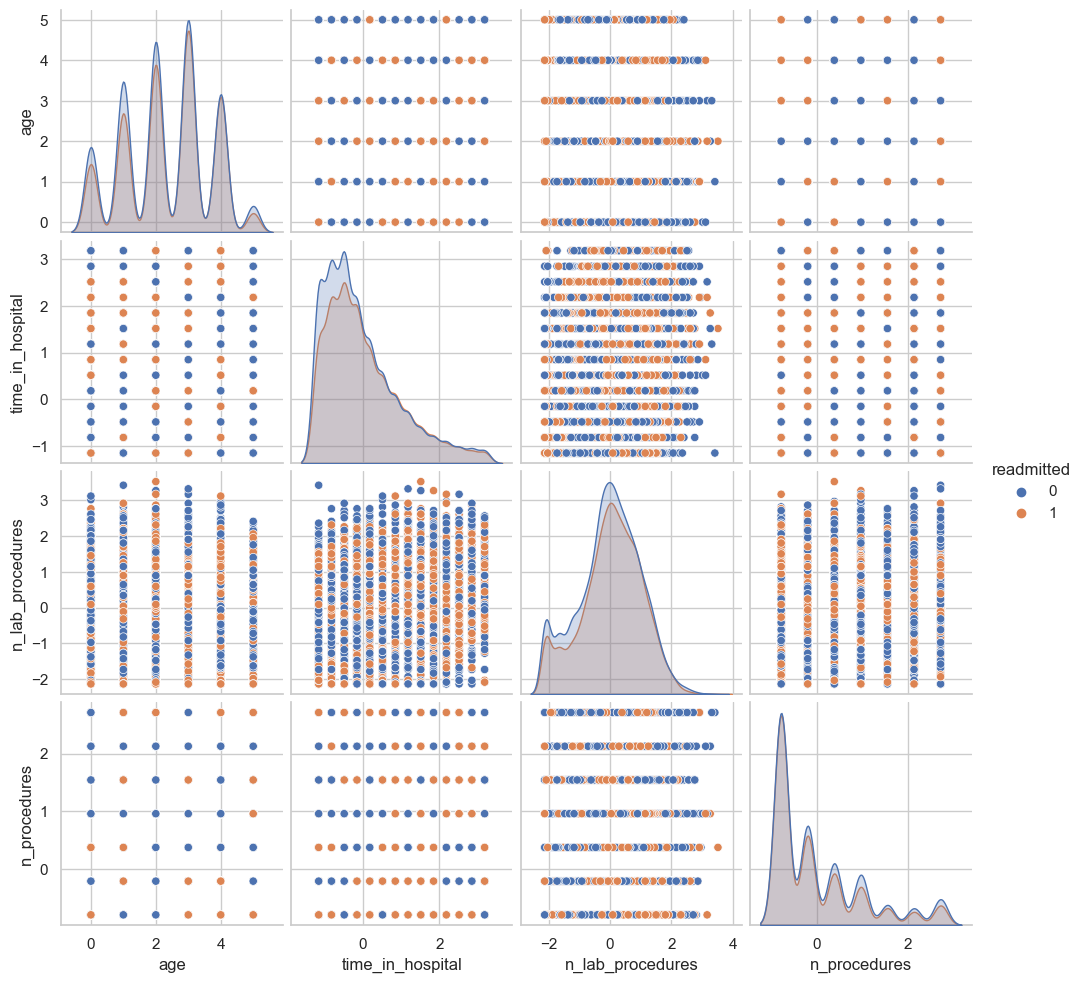

In [137]:
### 8. Pairplot (sample columns to avoid overload)
sample_cols = [col for col in df.columns if df[col].dtype != 'object'][:4]  # first 4 numeric
sns.pairplot(df[sample_cols + ['readmitted']], hue="readmitted")
plt.savefig(f"{plot_dir}/8_pairplot.png")